# 噪声模型
噪声主要有四种模型：高斯噪声、椒盐噪声、指数噪声和均匀噪声。本节代码将使用Python的opencv库为同一张图片添加四种不同噪声，并使用`matplotlib`库绘制对比图的代码示例。

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 为图像添加高斯噪声
def add_gaussian_noise(image, mean=0, std=10):
    """
    为输入图像添加高斯噪声
    :param image: 输入的图像（以灰度图形式，numpy数组表示）
    :param mean: 高斯分布的均值，默认值为0
    :param std: 高斯分布的标准差，默认值为10
    :return: 添加高斯噪声后的图像（numpy数组表示）
    """
    height, width = image.shape[:2]
    noise = np.random.normal(mean, std, (height, width)).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image


# 为图像添加椒盐噪声
def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    """
    为输入图像添加椒盐噪声
    :param image: 输入的图像（以灰度图形式，numpy数组表示）
    :param salt_prob: 盐噪声（白色像素点）出现的概率，默认值为0.01
    :param pepper_prob: 椒噪声（黑色像素点）出现的概率，默认值为0.01
    :return: 添加椒盐噪声后的图像（numpy数组表示）
    """
    height, width = image.shape[:2]
    noisy_image = image.copy()
    # 生成盐噪声（白色像素）
    salt_mask = np.random.rand(height, width) < salt_prob
    noisy_image[salt_mask] = 255
    # 生成椒噪声（黑色像素）
    pepper_mask = np.random.rand(height, width) < pepper_prob
    noisy_image[pepper_mask] = 0
    return noisy_image


# 为图像添加指数噪声
def add_exponential_noise(image, lam=1):
    """
    为输入图像添加指数噪声
    :param image: 输入的图像（以灰度图形式，numpy数组表示）
    :param lam: 指数分布的参数lambda，默认值为1
    :return: 添加指数噪声后的图像（numpy数组表示）
    """
    height, width = image.shape[:2]
    noise = np.random.exponential(scale=1 / lam, size=(height, width)).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image


# 为图像添加均匀噪声
def add_uniform_noise(image, a=0, b=255):
    """
    为输入图像添加均匀噪声
    :param image: 输入的图像（以灰度图形式，numpy数组表示）
    :param a: 均匀分布的下限，默认值为0
    :param b: 均匀分布的上限，默认值为255
    :return: 添加均匀噪声后的图像（numpy数组表示）
    """
    height, width = image.shape[:2]
    noise = np.random.uniform(a, b, (height, width)).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

### 代码解释
- **`add_gaussian_noise`函数**：
    - 该函数接受三个参数，`image`是输入的灰度图像，以二维的`numpy`数组形式传入（通过`cv2.imread`以灰度图模式读取图像得到的就是这种格式），`mean`是高斯分布的均值，默认设为`0`，`std`是高斯分布的标准差，默认设为`10`。标准差决定了噪声的强度，值越大，图像像素值的随机波动越剧烈。
    - 在函数内部，首先获取图像的高度和宽度，然后使用`np.random.normal`函数根据给定的均值和标准差生成与图像尺寸相同的高斯噪声数组（注意要将其数据类型转换为`np.uint8`，使其符合图像像素值的类型要求）。最后使用`cv2.add`函数将噪声数组与原始图像相加，得到添加高斯噪声后的图像并返回。

- **`add_salt_and_pepper_noise`函数**：
    - 此函数接受三个参数，`image`是输入图像，`salt_prob`是盐噪声（白色像素点）出现的概率，默认值为`0.01`，`pepper_prob`是椒噪声（黑色像素点）出现的概率，默认值为`0.01`。
    - 函数内部先复制一份原始图像，用于添加噪声后返回。通过`np.random.rand`函数生成与图像尺寸相同的随机数矩阵，与盐噪声出现概率进行比较，生成盐噪声的掩码（布尔类型数组，对应位置为`True`表示该位置添加盐噪声，即变为白色像素点`255`），同样的方法生成椒噪声的掩码，然后根据掩码将对应位置的像素值修改为相应的颜色值，最终返回添加椒盐噪声后的图像。

- **`add_exponential_noise`函数**：
    - 函数接受两个参数，`image`是输入图像，`lam`是指数分布的参数`lambda`，默认值为`1`。该参数影响指数分布的形状，进而影响噪声的特性。
    - 在函数内部，同样先获取图像尺寸，然后使用`np.random.exponential`函数根据给定的参数`lam`生成与图像尺寸相同的指数噪声数组（并转换为`np.uint8`类型），再通过`cv2.add`函数将其与原始图像相加，得到添加指数噪声后的图像并返回。

- **`add_uniform_noise`函数**：
    - 接受三个参数，`image`是输入图像，`a`是均匀分布的下限，默认值为`0`，`b`是均匀分布的上限，默认值为`255`。这两个参数确定了均匀噪声的取值范围。
    - 函数先获取图像尺寸，接着使用`np.random.uniform`函数生成在指定区间`[a, b]`内均匀分布的噪声数组（转换为`np.uint8`类型），最后利用`cv2.add`函数将噪声与原始图像相加，返回添加均匀噪声后的图像。

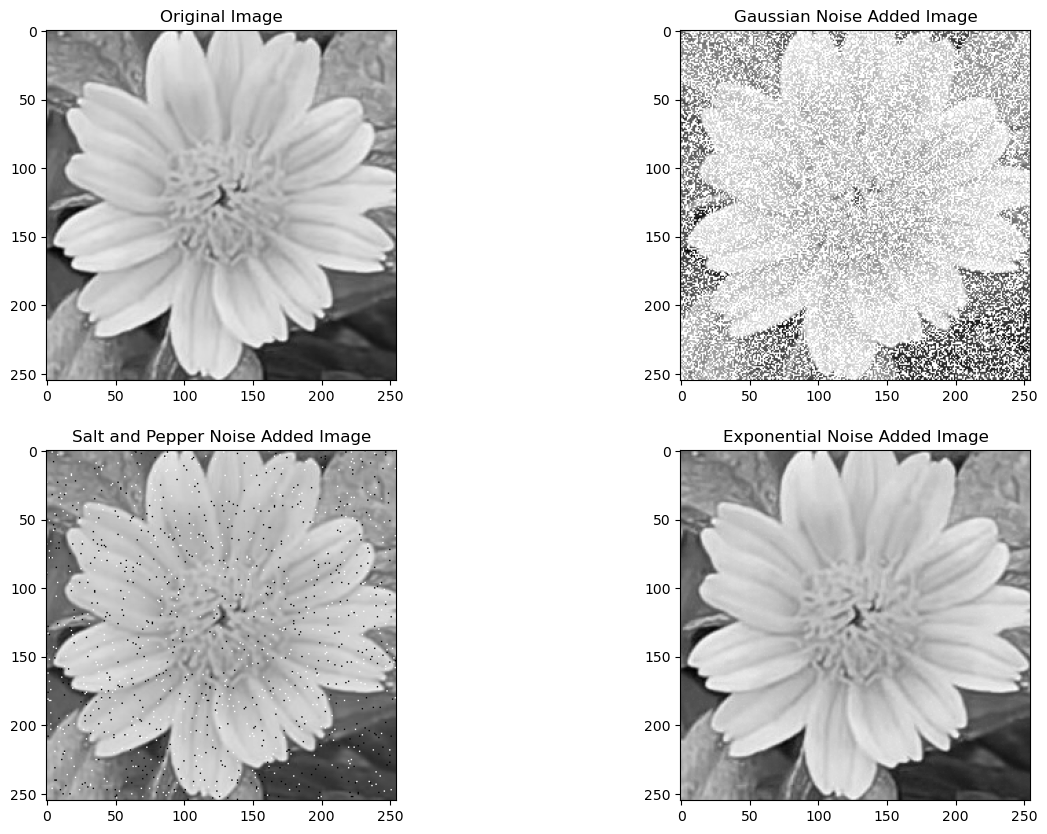

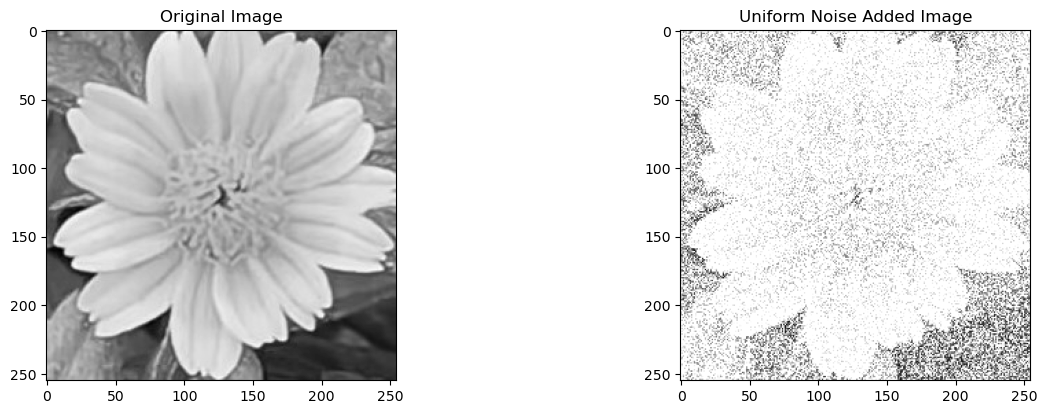

In [4]:
# 读取图像（以灰度图模式读取）
image = cv2.imread('flower.jpg', 0)

# 分别添加四种噪声
gaussian_noisy_image = add_gaussian_noise(image)
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(image)
exponential_noisy_image = add_exponential_noise(image)
uniform_noisy_image = add_uniform_noise(image)

# 使用matplotlib绘制对比图
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.title('Gaussian Noise Added Image')
# plt.savefig('degraded_flower.jpg')  # 此行用于保存绘制的图像

plt.subplot(2, 2, 3)
plt.imshow(salt_and_pepper_noisy_image, cmap='gray')
plt.title('Salt and Pepper Noise Added Image')

plt.subplot(2, 2, 4)
plt.imshow(exponential_noisy_image, cmap='gray')
plt.title('Exponential Noise Added Image')

plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(uniform_noisy_image, cmap='gray')
plt.title('Uniform Noise Added Image')

plt.show()